In [1]:
import pandas as pd

In [21]:
def read_file(path):
    try:
        df = pd.read_csv(path, header = 0, skipinitialspace=True, sep=',')
        print('doc file thanh cong')
        return df
    except FileNotFoundError:
        print('File khong ton tai')

In [22]:
df = read_file('hill-valley.csv')

doc file thanh cong


In [23]:
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,...,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51,1
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,...,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77,0
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,...,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77,1
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,...,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82,1


In [24]:
# tach du lieu
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print('X shape :', X.shape)
print('y shape', y.shape)

X shape : (1212, 100)
y shape (1212,)


In [31]:
y.unique()

array([0, 1])

In [25]:
from sklearn.preprocessing import MinMaxScaler
# Chuan hoa min max
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[3.23410461e-04, 3.26826856e-04, 3.13785122e-04, ...,
        3.31526542e-04, 3.22973439e-04, 3.33616018e-04],
       [7.72450182e-06, 7.43831843e-06, 7.72911145e-06, ...,
        7.90166888e-06, 7.41453098e-06, 6.98489438e-06],
       [5.78716027e-01, 6.07348067e-01, 6.13128820e-01, ...,
        6.10342597e-01, 5.94957501e-01, 6.54129683e-01],
       ...,
       [8.62404977e-02, 8.30862924e-02, 7.55612217e-02, ...,
        8.90258702e-02, 7.94121866e-02, 8.12420050e-02],
       [2.87674029e-04, 3.13786841e-04, 2.86733232e-04, ...,
        2.71662812e-04, 2.81752177e-04, 2.96246833e-04],
       [7.20544077e-02, 7.04535483e-02, 7.67138675e-02, ...,
        7.45382462e-02, 7.40429187e-02, 7.60647140e-02]])

In [26]:
X_scaled.shape

(1212, 100)

In [36]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, shuffle=True, random_state=42)
print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape)
print('y train shape: ',y_train.shape )
print('y test shape: ', y_test.shape)

X train shape:  (1151, 100)
X test shape:  (61, 100)
y train shape:  (1151,)
y test shape:  (61,)


In [34]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, make_scorer

In [40]:
svm = SVC()
naive = GaussianNB()
cv = StratifiedKFold(n_splits=10, shuffle= True, random_state=42)
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

In [41]:
result_svm = cross_validate(svm, X_train, y_train, cv = cv, scoring=scoring)
result_naive = cross_validate(naive, X_train, y_train, cv = cv, scoring=scoring)

In [42]:
result_svm

{'fit_time': array([0.14517903, 0.11283922, 0.11421204, 0.11540604, 0.11911416,
        0.12968731, 0.13403034, 0.11674809, 0.11404443, 0.11435127]),
 'score_time': array([0.03118229, 0.05042124, 0.03434348, 0.03359962, 0.03976059,
        0.02980995, 0.04841256, 0.03355598, 0.03795767, 0.04758692]),
 'test_accuracy': array([0.57758621, 0.50434783, 0.52173913, 0.53913043, 0.50434783,
        0.48695652, 0.53043478, 0.49565217, 0.43478261, 0.53043478]),
 'test_precision': array([1.        , 0.5       , 0.58333333, 0.64285714, 0.5       ,
        0.41666667, 0.56      , 0.5       , 0.26666667, 0.66666667]),
 'test_recall': array([0.15517241, 0.15789474, 0.12280702, 0.15789474, 0.14035088,
        0.0877193 , 0.24561404, 0.10344828, 0.06896552, 0.13793103])}

In [43]:
result_naive

{'fit_time': array([0.        , 0.        , 0.01779985, 0.01203442, 0.        ,
        0.        , 0.        , 0.01628923, 0.        , 0.        ]),
 'score_time': array([0.01689982, 0.        , 0.00383878, 0.00203037, 0.01458311,
        0.01667762, 0.        , 0.        , 0.01671433, 0.0168016 ]),
 'test_accuracy': array([0.44827586, 0.47826087, 0.53043478, 0.47826087, 0.51304348,
        0.53043478, 0.4173913 , 0.48695652, 0.43478261, 0.46956522]),
 'test_precision': array([0.47169811, 0.43478261, 0.6       , 0.44      , 0.51851852,
        0.58823529, 0.45192308, 0.47826087, 0.29411765, 0.48598131]),
 'test_recall': array([0.86206897, 0.1754386 , 0.15789474, 0.19298246, 0.24561404,
        0.1754386 , 0.8245614 , 0.18965517, 0.0862069 , 0.89655172])}

In [49]:
from matplotlib import pyplot as plt
import numpy as np

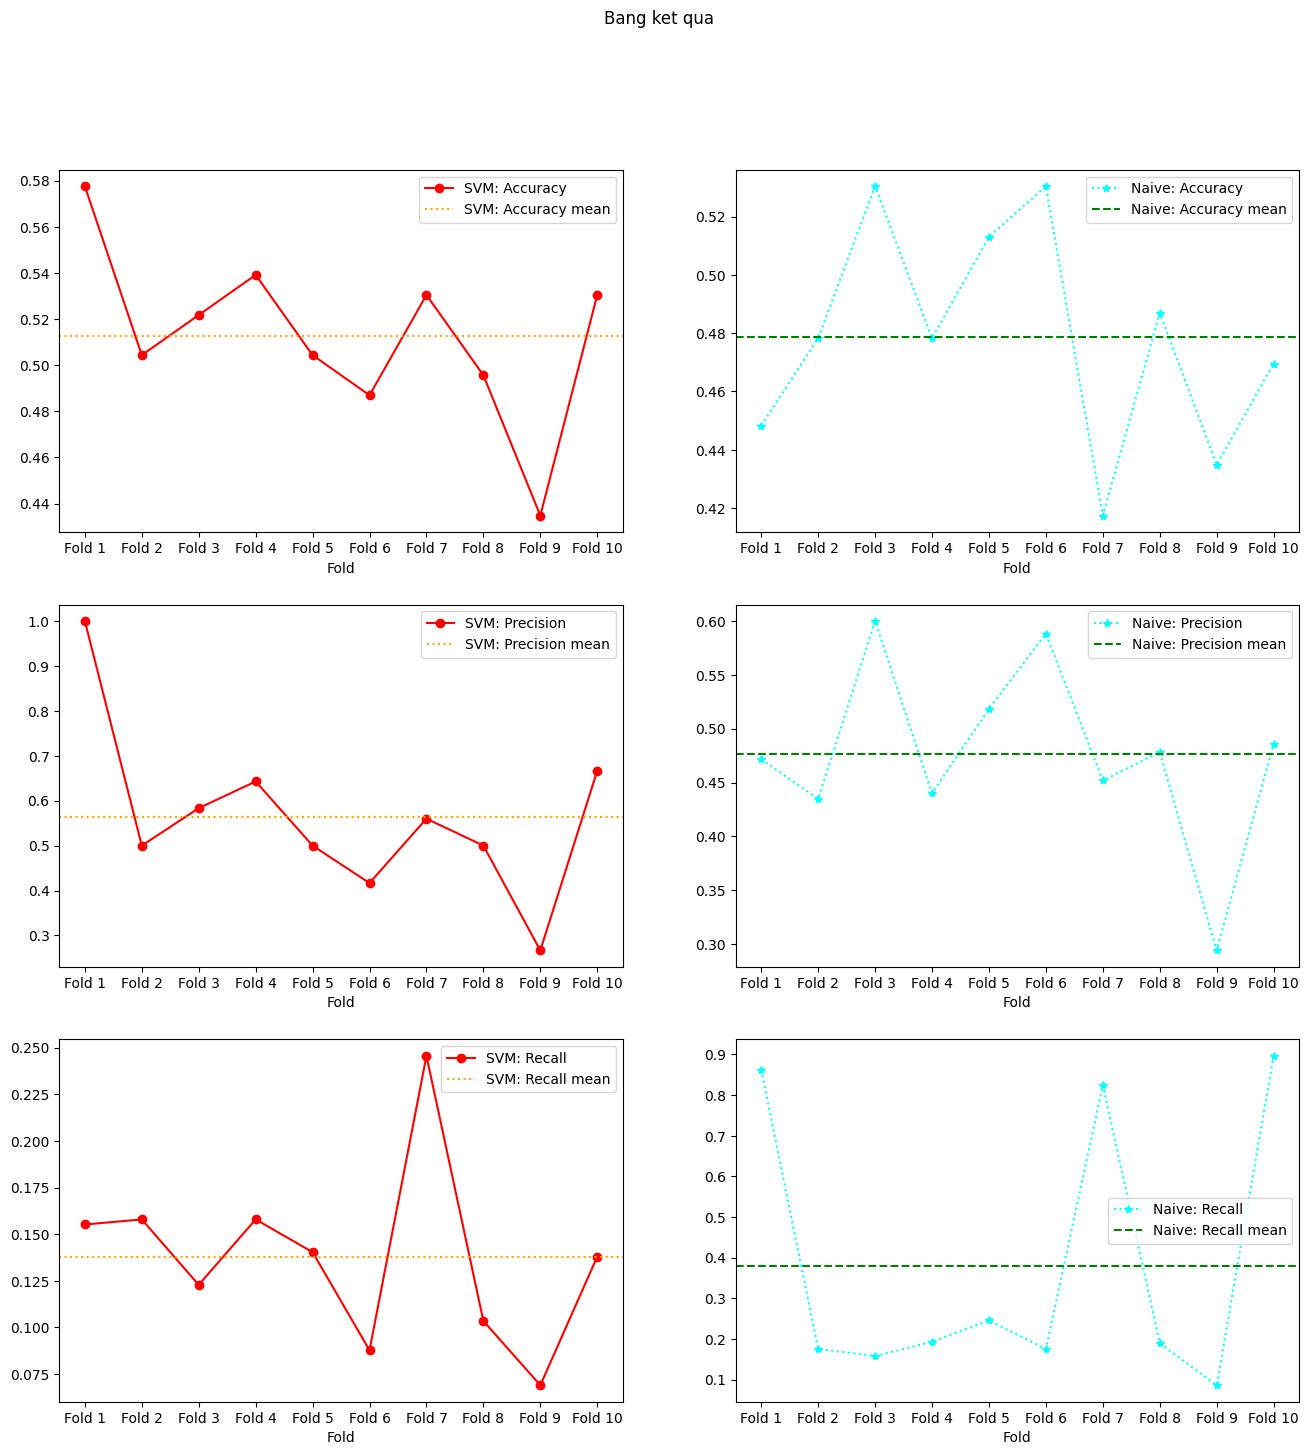

In [56]:
fig, axs = plt.subplots(3, 2, figsize = (16, 16))
fig.suptitle('Bang ket qua')
metrics = ['test_accuracy','test_precision', 'test_recall']
titles = ['Accuracy', 'Precision', 'Recall']
for i, metric in enumerate(metrics):
    svm_score = result_svm [metric]
    axs[i, 0].plot(svm_score, color = 'red', linestyle = '-', marker = 'o', label = f'SVM: {titles[i]}')
    axs[i, 0].axhline(np.mean(svm_score), color = 'orange', linestyle = ':', label = f'SVM: {titles[i]} mean')
    axs[i, 0].legend()
    naive_score = result_naive[metric]
    axs[i, 1].plot(naive_score, color = 'cyan', linestyle = ':', marker = '*', label = f'Naive: {titles[i]}')
    axs[i, 1].axhline(np.mean(naive_score), color = 'green', linestyle = '--', label = f'Naive: {titles[i]} mean')
    axs[i, 1].legend()

for ax in axs.flat:
    ax.set_xlabel('Fold')
    ax.set_xticks(range(10))
    ax.set_xticklabels(f'Fold {i+1}' for i in range(10) )
plt.show()